In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
from kaggle import api
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
!kaggle datasets download -d fedesoriano/cern-electron-collision-data

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data
License(s): CC0-1.0
 48% 3.00M/6.25M [00:00<00:00, 5.39MB/s]
100% 6.25M/6.25M [00:00<00:00, 8.41MB/s]


In [4]:
import zipfile
z=zipfile.ZipFile('/content/cern-electron-collision-data.zip','r')
z.extractall('/content')
z.close()

Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [13]:
df = pd.read_csv(r'/content/dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB


In [15]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


Check null values

In [16]:
df.isnull().sum()

,0
Run,0
Event,0
E1,0
px1,0
py1,0
pz1,0
pt1,0
eta1,0
phi1,0
Q1,0


In [17]:
df.corr()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
Run,1.000000,0.177591,0.093160,-0.000805,0.002612,-0.008263,0.154394,-0.005313,-0.001447,0.002163,0.099260,0.002809,-0.004938,0.002738,0.151615,0.005224,0.000432,0.002110,0.129452
Event,0.177591,1.000000,0.040582,-0.001221,0.001085,-0.003456,0.059086,-0.005444,-0.000474,-0.005656,0.042177,-0.000759,-0.004475,0.002236,0.058890,0.003076,-0.003610,0.003686,0.052364
E1,0.093160,0.040582,1.000000,0.006000,0.033998,-0.042896,0.716405,-0.020540,0.020598,0.018693,-0.153928,-0.010165,-0.020166,-0.000463,-0.139307,-0.008389,-0.007031,-0.001123,0.285231
px1,-0.000805,-0.001221,0.006000,1.000000,-0.008246,-0.012964,-0.004785,-0.010422,-0.007364,-0.005349,-0.004689,-0.326203,0.001338,-0.004637,-0.003673,-0.003684,0.002400,0.005808,0.006112
py1,0.002612,0.001085,0.033998,-0.008246,1.000000,-0.010190,0.014005,-0.011570,0.593994,-0.002777,0.001990,0.002932,-0.333377,0.000201,0.002553,-0.001624,-0.221696,0.003516,0.007538
pz1,-0.008263,-0.003456,-0.042896,-0.012964,-0.010190,1.000000,-0.010538,0.771540,-0.011113,-0.002696,0.001790,0.002600,-0.001779,0.205669,0.005678,0.229279,0.003791,0.000509,0.011526
pt1,0.154394,0.059086,0.716405,-0.004785,0.014005,-0.010538,1.000000,0.012602,0.005075,0.018449,-0.170137,-0.008233,-0.020131,0.012364,-0.031569,0.004559,-0.006604,-0.003217,0.437140
eta1,-0.005313,-0.005444,-0.020540,-0.010422,-0.011570,0.771540,0.012602,1.000000,-0.013193,-0.001729,-0.008917,-0.000823,-0.004075,0.223965,-0.005242,0.245753,0.002155,0.003021,0.017102
phi1,-0.001447,-0.000474,0.020598,-0.007364,0.593994,-0.011113,0.005075,-0.013193,1.000000,0.000666,0.001574,0.003230,-0.217198,0.000037,-0.000796,0.000695,-0.134250,-0.001711,0.001833
Q1,0.002163,-0.005656,0.018693,-0.005349,-0.002777,-0.002696,0.018449,-0.001729,0.000666,1.000000,-0.011930,-0.003489,0.003405,-0.005289,-0.008557,-0.004432,-0.001543,-0.141087,0.005624


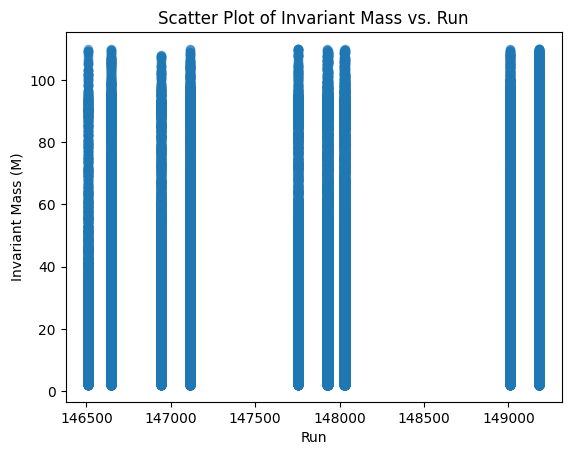

In [18]:
plt.scatter(df['Run'], df['M'], alpha=0.5)
plt.xlabel('Run')
plt.ylabel('Invariant Mass (M)')
plt.title('Scatter Plot of Invariant Mass vs. Run')
plt.show()


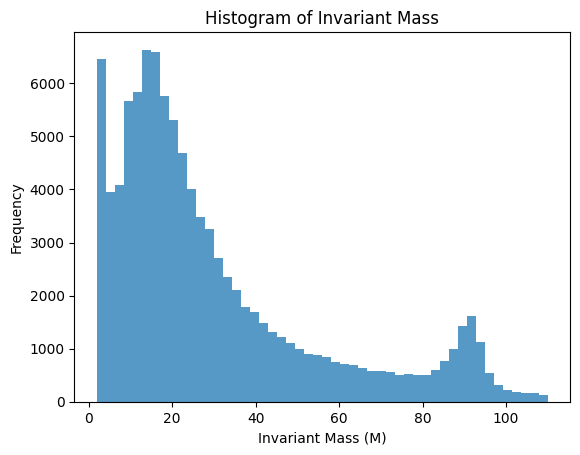

In [19]:
plt.hist(df['M'], bins=50, alpha=0.75)
plt.xlabel('Invariant Mass (M)')
plt.ylabel('Frequency')
plt.title('Histogram of Invariant Mass')
plt.show()


Data Cleaning

In [20]:
# Drop rows where the 'M' column has missing values
df_cleaned = df.dropna(subset=['M'])

# Check the shape of the cleaned dataframe
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (100000, 19)
Cleaned DataFrame shape: (99915, 19)


In [21]:
# Loop through each column and print the unique values
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values[:10]}")  # Displaying first 10 unique values for brevity
    print("-" * 40)


Column: Run
Number of Unique Values: 13
Unique Values: [147115 146644 149181 147114 149011 148031 147754 147929 148029 147926]
----------------------------------------
Column: Event
Number of Unique Values: 99891
Unique Values: [366639895 366704169 367112316 366952149 366523212 366663412 366639101
 367133576 368639137 367825395]
----------------------------------------
Column: E1
Number of Unique Values: 95588
Unique Values: [58.7141   6.61188 25.5419  65.3959  61.4504   6.39616 84.5058  77.0057
  9.68787 27.8812 ]
----------------------------------------
Column: px1 
Number of Unique Values: 97133
Unique Values: [ -7.31132  -4.15213 -11.4809    7.51214   2.95284  -5.45672   8.82436
  10.0029    1.11192  11.939  ]
----------------------------------------
Column: py1
Number of Unique Values: 97073
Unique Values: [ 10.531     -0.579855   2.04168   11.8871   -14.6227    -2.09068
  10.5789     9.17545    2.05064  -18.3462  ]
----------------------------------------
Column: pz1
Number of Un

In [22]:
# Drop the 'Run' column
df_cleaned = df_cleaned.drop(columns=['Run','Event'])

# Ensure 'Q1' and 'Q2' are treated as categorical
df_cleaned['Q1'] = df_cleaned['Q1'].astype('category')
df_cleaned['Q2'] = df_cleaned['Q2'].astype('category')

# Verify the changes
print(df_cleaned.info())
print('Null Count: ',df_cleaned.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 99915 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   E1      99915 non-null  float64 
 1   px1     99915 non-null  float64 
 2   py1     99915 non-null  float64 
 3   pz1     99915 non-null  float64 
 4   pt1     99915 non-null  float64 
 5   eta1    99915 non-null  float64 
 6   phi1    99915 non-null  float64 
 7   Q1      99915 non-null  category
 8   E2      99915 non-null  float64 
 9   px2     99915 non-null  float64 
 10  py2     99915 non-null  float64 
 11  pz2     99915 non-null  float64 
 12  pt2     99915 non-null  float64 
 13  eta2    99915 non-null  float64 
 14  phi2    99915 non-null  float64 
 15  Q2      99915 non-null  category
 16  M       99915 non-null  float64 
dtypes: category(2), float64(15)
memory usage: 12.4 MB
None
Null Count:  0


Heat map

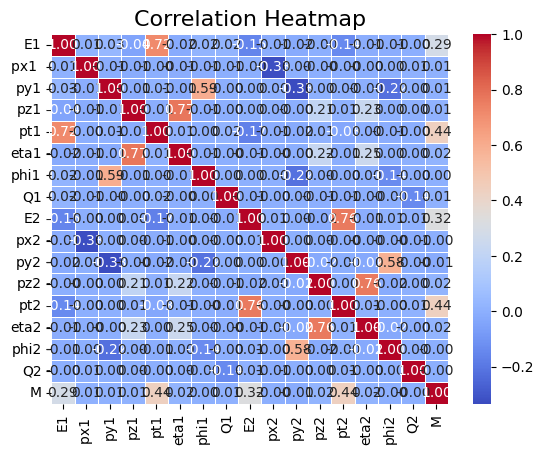

In [23]:
sb.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Data preprocessing

In [24]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_data(df, target_column='M', test_size=0.2, random_state=42):
    """
    Preprocess the dataset for PyTorch training.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - target_column: The name of the column to be predicted.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Controls the shuffling applied to the data before the split.

    Returns:
    - X_train: Training features as a PyTorch tensor.
    - X_test: Testing features as a PyTorch tensor.
    - y_train: Training labels as a PyTorch tensor.
    - y_test: Testing labels as a PyTorch tensor.
    """

    # Drop rows with NaN in the target column
    df_cleaned = df.dropna(subset=[target_column])

    # Separate features and target
    y = df_cleaned[target_column]
    X = df_cleaned.drop(columns=[target_column])


    # Define categorical and numerical columns
    categorical_cols = ['Q1', 'Q2']
    numerical_cols = X.columns.difference(categorical_cols)

    # Create the column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', OneHotEncoder(drop='first'), categorical_cols)
        ])

    # Apply transformations
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_preprocessed, y, test_size=test_size, random_state=random_state
    )

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape to match (n_samples, 1)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)    # Reshape to match (n_samples, 1)

    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor


In [25]:
X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = preprocess_data(df_cleaned)

In [26]:
print("Checking for NaNs in training data:")
print("X_train_tensor:", torch.isnan(X_train_tensor).any())
print("y_train_tensor:", torch.isnan(y_train_tensor).any())
print("X_test_tensor:", torch.isnan(X_test_tensor).any())
print("y_test_tensor:", torch.isnan(y_test_tensor).any())


Checking for NaNs in training data:
X_train_tensor: tensor(False)
y_train_tensor: tensor(False)
X_test_tensor: tensor(False)
y_test_tensor: tensor(False)


In [27]:
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_train_tensor: torch.Size([79932, 16])
Shape of y_train_tensor: torch.Size([79932, 1])
Shape of X_test_tensor: torch.Size([19983, 16])
Shape of y_test_tensor: torch.Size([19983, 1])


Model creation and training

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

class EnhancedLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(EnhancedLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, hidden_size)  # Additional layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(hidden_size, 1)  # Output layer

    def forward(self, x):
        out, _ = self.lstm(x)
        if out.dim() == 3:
            out = self.relu(out[:, -1, :])  # Apply ReLU activation to the last time step
        elif out.dim() == 2:
            out = self.relu(out)  # Apply ReLU activation if no sequence dimension
        else:
            raise ValueError("Unexpected tensor dimensions from LSTM")
        out = self.fc1(out)  # First fully connected layer
        out = self.relu(out)  # ReLU activation for additional layer
        out = self.fc2(out)  # Output layer
        return out

# Hyperparameters
hidden_size = 128
input_size = X_train_tensor.shape[1]
num_layers = 1
learning_rate = 0.001
num_epochs = 100

# Instantiate and train the model
model = EnhancedLSTMModel(input_size, hidden_size, num_layers)
criterion = nn.L1Loss()  # MAE
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_losses = [] # Lists to store loss values
model_save_path = 'lstm_model.pth'

# Training loop
for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor.squeeze())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

# Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze().numpy()
    actuals = y_test_tensor.squeeze().numpy()

    mae = mean_absolute_error(actuals, predictions)
    print(f'Mean Absolute Error on Test Set: {mae:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch [1/100], Loss: 29.9189
Epoch [2/100], Loss: 29.8975
Epoch [3/100], Loss: 29.8759
Epoch [4/100], Loss: 29.8538
Epoch [5/100], Loss: 29.8307
Epoch [6/100], Loss: 29.8062
Epoch [7/100], Loss: 29.7794
Epoch [8/100], Loss: 29.7495
Epoch [9/100], Loss: 29.7151
Epoch [10/100], Loss: 29.6740
Epoch [11/100], Loss: 29.6226
Epoch [12/100], Loss: 29.5547
Epoch [13/100], Loss: 29.4577
Epoch [14/100], Loss: 29.3066
Epoch [15/100], Loss: 29.0510
Epoch [16/100], Loss: 28.6336
Epoch [17/100], Loss: 28.1058
Epoch [18/100], Loss: 27.5751
Epoch [19/100], Loss: 27.0702
Epoch [20/100], Loss: 26.5826
Epoch [21/100], Loss: 26.1033
Epoch [22/100], Loss: 25.6247
Epoch [23/100], Loss: 25.1402
Epoch [24/100], Loss: 24.6476
Epoch [25/100], Loss: 24.1488
Epoch [26/100], Loss: 23.6480
Epoch [27/100], Loss: 23.1505
Epoch [28/100], Loss: 22.6599
Epoch [29/100], Loss: 22.1794
Epoch [30/100], Loss: 21.7138
Epoch [31/100], Loss: 21.2681
Epoch [32/100], Loss: 20.8420
Epoch [33/100], Loss: 20.4364
Epoch [34/100], Los

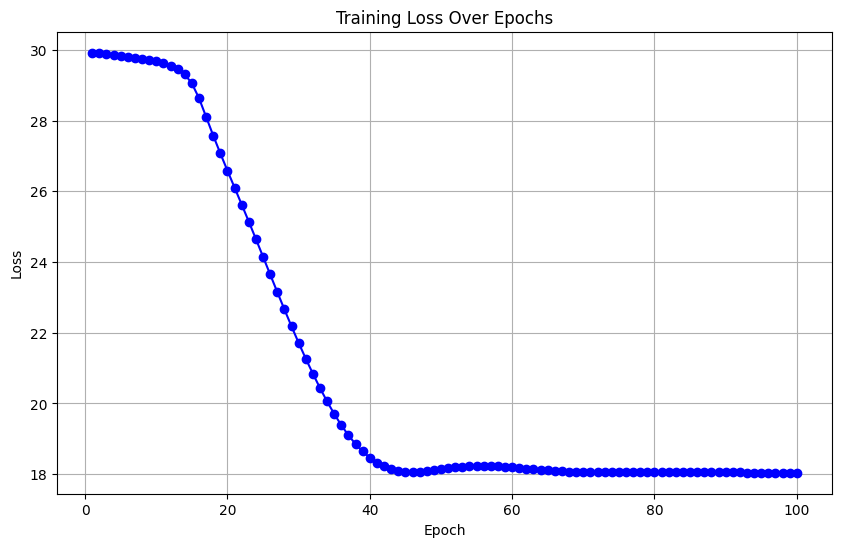

In [30]:
# Plotting the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', color='b', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

Predictions

In [31]:
print(predictions)

[ 1.6505722  2.511917   4.5812974 ... 21.377962  21.36685   21.412928 ]
